In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">ch10 N차원 배열 다루기</font>

# 4절. 복사와 뷰

## 4.1 할당

In [2]:
import numpy as np

a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [18]:
b = a
b

array([0, 1, 2, 3, 4, 5])

In [19]:
a is b  # a객체와 b객체가 같은가?

True

In [20]:
b.shape = (2, 3)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [21]:
a

array([[0, 1, 2],
       [3, 4, 5]])

## 4.2 뷰(view)

- 슬라이싱할 경우 자동 view 생성

In [22]:
c = np.arange(12).reshape(2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [37]:
d = c.view()
d

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [38]:
c is d  # c객체와 d객체가 같은가?

False

In [39]:
id(c), id(d)

(2475170223696, 2475170224272)

In [40]:
np.all(c == d)  # c와 d의 내용이 모두 같음

True

In [41]:
d.shape = (3, 4)
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [42]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [44]:
d[0, ::2] = -99
d

array([[-99,   1, -99,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

In [45]:
c

array([[-99,   1, -99,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

In [46]:
# 슬라이싱이 될 때 자동 뷰가 반환됨

c = np.arange(12).reshape(2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [47]:
d = c[:, :-1]
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

In [48]:
d[..., -1] = 99
d

array([[ 0,  1,  2,  3, 99],
       [ 6,  7,  8,  9, 99]])

In [49]:
c

array([[ 0,  1,  2,  3, 99,  5],
       [ 6,  7,  8,  9, 99, 11]])

## 4.3 깊은 복사

In [50]:
c = np.arange(12).reshape(2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [51]:
d = c[:, :-1].copy()  # 깊은 복사
d[..., -2] = 99
d

array([[ 0,  1,  2, 99,  4],
       [ 6,  7,  8, 99, 10]])

In [52]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

# 5절. 고급인덱싱

## 5.1 인덱스 배열로 인덱싱

In [62]:
a = np.arange(12) ** 2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [63]:
a[[0, 0, 1, 5]]

array([ 0,  0,  1, 25])

In [64]:
# 인덱싱하기 위한 값을 배열로 만듦

i = np.array([0, 0, 1, 5])
a[i]

array([ 0,  0,  1, 25])

In [65]:
j = np.array([[0, 0], [1, 5]])
a[j]

array([[ 0,  0],
       [ 1, 25]])

In [55]:
# image_data = [[[255, 255, 255],
#                [255, 255, 255],
#                [255, 255, 255],
#                [0, 0, 0],
#                ],
#              ]

In [56]:
# R G B

palette = np.array([[0, 0, 0],         # black
                    [255, 0, 0],       # red
                    [0, 255, 0],       # green
                    [0, 0, 255],       # blue
                    [255, 255, 255]])  # white

In [66]:
image_index = np.array([[4, 4, 4, 0, 0, 0, 0, 4, 4, 4],
                        [4, 0, 0, 4, 4, 4, 4, 0, 0, 4],
                        [0, 0, 4, 4, 4, 4, 4, 4, 0, 0],
                        [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
                        [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
                        [0, 4, 4, 4, 4, 4, 4, 4, 4, 0],
                        [0, 4, 4, 2, 4, 4, 2, 4, 4, 0],
                        [4, 0, 4, 4, 2, 2, 4, 4, 0, 4],
                        [4, 4, 0, 4, 4, 4, 4, 0, 4, 4],
                        [4, 4, 4, 0, 0, 0, 0, 4, 4, 4]])
image_data = palette[image_index]

In [67]:
image_data.shape

(10, 10, 3)

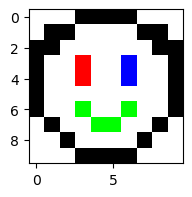

In [68]:
from matplotlib import pyplot as plt

plt.figure(figsize = (2, 2))
plt.imshow(image_data)
plt.show()

## 5.2 논리 배열을 이용한 인덱싱

In [69]:
a = np.array([0, 1, 10, 11, 12, 13, 14, 15, 99])
a

array([ 0,  1, 10, 11, 12, 13, 14, 15, 99])

In [70]:
a % 2 == 0

array([ True, False,  True, False,  True, False,  True, False, False])

In [71]:
a[[True, False,  True, False,  True, False,  True, False, False]]

array([ 0, 10, 12, 14])

In [73]:
a[a % 2 == 0]  # 논리 배열을 이용한 인덱싱 시 True요소만 추출

array([ 0, 10, 12, 14])

In [74]:
# a에서 12보다 큰값만 추출

a[a > 12]

array([13, 14, 15, 99])

# 6절. 선형대수

- 2차원 넘파이배열을 행렬
    * 행렬 곱 : @, dot(), 단위행렬
    * 역행렬 : np.linalg.inv(행렬) : 역행렬 @ 행렬 = 단위행렬
    * 전치행렬 : 행렬.T / 행렬.transpose()

In [78]:
a = np.array([[1, 2], [3, 4]])
a  # 정방행렬

array([[1, 2],
       [3, 4]])

In [81]:
# a의 역행렬 : a의 역행렬 @ a → 단위행렬

b = np.linalg.inv(a)
b

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [84]:
a.dot(b), a @ b

(array([[1.00000000e+00, 1.11022302e-16],
        [0.00000000e+00, 1.00000000e+00]]),
 array([[1.00000000e+00, 1.11022302e-16],
        [0.00000000e+00, 1.00000000e+00]]))

## 6.1 선형 연립 방정식 풀기(독립변수1, 데이터2)

In [7]:
x = np.array([2, 4])  # 독립변수
Y = np.array([40, 60])  # 종속변수

# X = np.dstack((x, np.ones(len(x))))  dstack : 차원증가
X = np.column_stack( (x, np.ones(len(x))))
X, X.shape

(array([[2., 1.],
        [4., 1.]]),
 (2, 2))

In [9]:
Y.reshape(-1, 1)  # 출력결과가 나오면 Y는 그대로, return 값만 출력

array([[40],
       [60]])

In [4]:
# X @ wb = Y
# X의 역행렬 @ X @ wb = X의 역행렬 @ Y
# wb = X의 역행렬 @ Y

wb = np.linalg.inv(X) @ Y
wb

array([[10., 20.]])

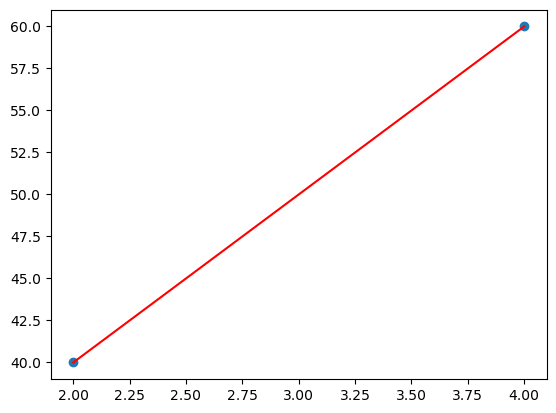

In [10]:
import matplotlib.pyplot as plt

plt.scatter(x, Y)
plt.plot(x, 10 * x + 20, 'r')
plt.show()

In [11]:
np.linalg.solve(X, Y)  # w(기울기), b(y절편)을 구하는 함수

array([10., 20.])

## 6.2 선형연립방정식 풀기(회귀분석) : 독립변수 1개 데이터 n개

In [13]:
x = np.array([32, 64, 96, 118])
X = np.c_[x, np.ones(len(x))]
X  # 정방행렬이 아님

array([[ 32.,   1.],
       [ 64.,   1.],
       [ 96.,   1.],
       [118.,   1.]])

In [ ]:
# np.linalg.inv(X)  X가 정방행렬이 아니면 역행렬을 구할 수 없음

In [16]:
X.T, X.transpose()  # 전치행렬

(array([[ 32.,  64.,  96., 118.],
        [  1.,   1.,   1.,   1.]]),
 array([[ 32.,  64.,  96., 118.],
        [  1.,   1.,   1.,   1.]]))

In [17]:
X_ = X.T @ X
X_

array([[2.826e+04, 3.100e+02],
       [3.100e+02, 4.000e+00]])

In [18]:
# X가 정방행렬이 아닐 경우, X.T @ X로 정방행렬을 만든 후 역행렬을 곱

np.linalg.inv(X_) @ X_

array([[1., 0.],
       [0., 1.]])

In [21]:
x = np.array([32, 64, 96, 118, 126, 144, 152.5, 158])
y = np.array([18, 24, 61.5, 49, 52, 105, 130.3, 125])
X = np.c_[x, np.ones(len(x))]  # np.c_[x, np.ones(x.shape[0])]
Y = y.reshape(-1, 1)
X, Y

(array([[ 32. ,   1. ],
        [ 64. ,   1. ],
        [ 96. ,   1. ],
        [118. ,   1. ],
        [126. ,   1. ],
        [144. ,   1. ],
        [152.5,   1. ],
        [158. ,   1. ]]),
 array([[ 18. ],
        [ 24. ],
        [ 61.5],
        [ 49. ],
        [ 52. ],
        [105. ],
        [130.3],
        [125. ]]))

In [23]:
# X @ wb = Y
# X.T @ X @ wb = X.T @ Y
# (X.T @ X)의 역행렬 @ X.T @ X @ wb = (X.T @ X)의 역행렬 @ X.T @ Y
# X_의 역행렬 @ X_ @ wb = X_의 역행렬 @ X.T @ Y
# X의 역행렬 @ X @ wb = X의 역행렬 @ Y

wb = np.linalg.inv(X.T @ X) @ X.T @ Y
wb

array([[  0.87493126],
       [-26.79078617]])

In [25]:
print(wb[0, 0], wb[1, 0])  # 기울기와 Y절편
y_hat = wb[0, 0] * x + wb[1, 0]
print('독립변수 :', x)
print('종속변수 :', y)
print('예측값 :', y_hat)

0.8749312625981291 -26.79078616795418
독립변수 : [ 32.   64.   96.  118.  126.  144.  152.5 158. ]
종속변수 : [ 18.   24.   61.5  49.   52.  105.  130.3 125. ]
예측값 : [  1.20701424  29.20481464  57.20261504  76.45110282  83.45055292
  99.19931565 106.63623138 111.44835332]


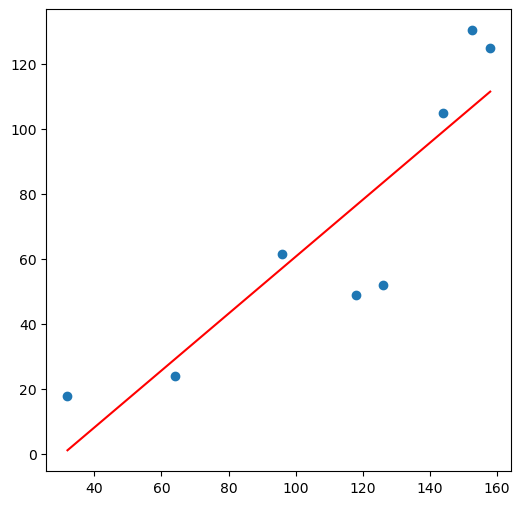

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))
plt.scatter(x, y)
plt.plot(x, y_hat, 'r')
plt.show()

# 7절. 연습문제

## 7.1 연습문제 실습형

In [27]:
# ex0. 다음 코드는 iris 데이터의 독립변수 (sepal_length, sepal_width, petal_length, petal_width) 정보만 갖도록 한 코드입니다
#     이를 이용해서 주어진 문제를 해결하세요

import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data

In [31]:
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [28]:
type(iris_data), iris_data.dtype, iris_data.shape  # 150행 4열짜리 float 배열

(numpy.ndarray, dtype('float64'), (150, 4))

In [136]:
# ex1. 각 변수별 평균을 출력하세요

sepal_length = iris_data[:, 0]
sepal_width = iris_data[:, 1]
petal_length = iris_data[:, 2]
petal_width = iris_data[:, 3]

np.mean(iris_data, axis = 0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [78]:
# ex2. 처음 다섯개 행을 출력하세요

iris_data[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [82]:
# ex3. 처음 다섯개 행에서 마지막 열을 제외한 나머지 열을 출력하세요

iris_data[:5, :-1]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [83]:
# ex4. 처음 다섯개 행에서 마지막 열만 출력하세요

iris_data[:5, -1]

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [94]:
# ex5. 3번 배열과 4번 배열을 원래 모양이 되도록 합치세요 실행 결과는 2번의 결과와 같아야 합니다

np.hstack((iris_data[:5, :-1], iris_data[:5, -1].reshape(-1, 1)))
np.all(iris_data[:5, :] == np.hstack((iris_data[:5, :-1], iris_data[:5, -1].reshape(-1, 1))))

True

In [158]:
a1 = np.c_[iris_data[:5, :-1], iris_data[:5, -1]]
a2 = np.column_stack((iris_data[:5, :-1], iris_data[:5, -1]))
a3 = np.hstack((iris_data[:5, :-1], iris_data[:5, -1][:, np.newaxis]))
a4 = np.hstack((iris_data[:5, :-1], iris_data[:5, -1].reshape(-1, 1)))
a5 = np.concatenate((iris_data[:5, :-1], iris_data[:5, -1].reshape(-1, 1)), axis = 1)

In [159]:
# 위의 5개 답이 다 같은지 여부

answers = (a1, a2, a3, a4, a5)
all([np.all(a1 == answer) for answer in answers])

True

In [162]:
# 위의 all을 함수로 만들기

def same_all(*answers) :
    if len(answers) > 0 :
        return all(np.all(answers[0] == answer) for answer in answers)
    else :
        return False

In [163]:
same_all(a1, a2, a3, a4, a5)

True

In [170]:
# ex6. 처음 다섯개 행을 이용해서 각 열 별로 평균보다 큰 값들만 출력하세요

sample = iris_data[:5].copy()
mean_ = np.mean(iris_data[:5, :], axis = 0)
sample[sample > mean_]

array([5.1, 3.5, 4.9, 1.5, 5. , 3.6])

In [171]:
np.where(sample > mean_ , sample, None)

array([[5.1, 3.5, None, None],
       [4.9, None, None, None],
       [None, None, None, None],
       [None, None, 1.5, None],
       [5.0, 3.6, None, None]], dtype=object)

In [179]:
sample[sample <= mean_] = None  # 결측치(타입 : float)
sample

array([[5.1, 3.5, nan, nan],
       [4.9, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, 1.5, nan],
       [5. , 3.6, nan, nan]])

## 7.2 연습문제 문제풀이형

In [168]:
# ex1. 다음 보기의 데이터가 있을 경우 print(a.sum(0))의 결과는?
'''
import numpy as np

a = np.arange(12).reshape(3, 4)
a

① 66
② [6 22 38]
③ [12 15 18 21]
④ 0
'''

print('정답 : ③')

정답 : ③


In [184]:
# ex2. a데이터가 다음과 같을 때 다음 중 차원을 바꿀 수 있는 방법을 모두 고르세요
'''
import numpy as np

a = np.floor(10 * np.random.random((3, 4)))
a, a.shape

① a.ravel()
② a.reshape(6, 2)
③ a.resize((2, 6))
④ a.T
'''

print('정답 : ③')

정답 : ③


In [185]:
# ex3. 다음 데이터에서 첫번째 행과 두번째 행만 뽑아내고 싶습니다 빈칸에 들어갈 내용으로 옳은 것을 고르세요
'''
import numpy as np

a = np.arange(12).reshape(3, 4)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])
       
① a[:2]
② a[:, :2]
③ a[1, 2]
④ a[1][2]          
'''

print('정답 : ①')

정답 : ①


In [186]:
# ex4. 다음 코드의 실행 결과는?
'''
import numpy as np

a = np.array([1, 2, 3, 4, 5])
a[[1, 3, 4]] = 0
a

① [0 2 0 0 5]
② [1 0 3 0 0]
③ [1 2 3 4 5 ]
④ 프로그램 오류, a[1, 3, 4] = 0으로 코드를 수정해야 한다          
'''

print('정답 : ③')

정답 : ③


In [187]:
# ex5. 다음 두 배열 a, b를 출력의 예시처럼 만들고 싶을 때 빈 칸에 입력해야 할 내용으로 바른 것은?

'''
import numpy as np

a = np.array([1, 2, 3, 4, 5])
b = np.array([6, 7, 8, 9, 10])

array([[1, 6],
       [2, 7],
       [3, 8],
       [4, 9],
       [5, 10]])

① np.r_[a, b]
② np.c_[a, b]
③ np.ix_(a, b)
④ [[a], [b]]          
'''

print('정답 : ②')

정답 : ②


In [194]:
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])

answer1 = np.c_[a,b]
answer2 = np.column_stack( [a,b] )
answer3 = np.hstack((a[:, np.newaxis], b[:, np.newaxis]))
answer4 = np.stack([a,b], axis=1)
answer5 = np.stack([a,b], axis=-1)
answer6 = np.concatenate( (a.reshape(-1, 1), b.reshape(-1, 1)), axis=1) # 비추

answers = [answer1, answer2, answer3, answer4, answer5, answer6]

all(np.all(answer == answer1) for answer in answers)
same_all(*answers)

True